In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
puntos = np.array([[0.0, 0.8554428669760865],
 [0.10256410256410256, 0.8192503889643609],
 [0.20512820512820512, 0.9106698108197717],
 [0.3076923076923077, 0.8712405328999302],
 [0.41025641025641024, 1.028882810913172],
 [0.5128205128205128, 0.9042429634802972],
 [0.6153846153846154, 0.855131704289422],
 [0.717948717948718, 0.8320615040511042],
 [0.8205128205128205, 0.5404161442504423],
 [0.923076923076923, 0.4607411363876057],
 [1.0256410256410255, 0.5230079911073856],
 [1.1282051282051282, 0.4319333734735373],
 [1.2307692307692308, 0.3194709855419703],
 [1.3333333333333333, 0.3176511643072673],
 [1.435897435897436, 0.08845060273327107],
 [1.5384615384615383, -0.1118729194358061],
 [1.641025641025641, -0.05123505155215124],
 [1.7435897435897436, -0.2758484321392249],
 [1.846153846153846, -0.3354753113897514],
 [1.9487179487179487, -0.26956032827356446],
 [2.051282051282051, -0.571247853583287],
 [2.1538461538461537, -0.7087933751789464],
 [2.2564102564102564, -0.7346123839017604],
 [2.358974358974359, -0.9422578154572859],
 [2.4615384615384617, -0.6839691792454056],
 [2.564102564102564, -0.9525757587137708],
 [2.6666666666666665, -0.8747644889180131],
 [2.769230769230769, -0.9126743380349072],
 [2.871794871794872, -1.0825927238281552],
 [2.9743589743589745, -1.0103075868775828],
 [3.0769230769230766, -0.907399219424252],
 [3.1794871794871793, -0.851996743383459],
 [3.282051282051282, -0.9446601118164999],
 [3.3846153846153846, -1.0173310927863406],
 [3.4871794871794872, -0.8906772736257376],
 [3.5897435897435894, -0.896632562845944],
 [3.692307692307692, -0.8524291153089643],
 [3.7948717948717947, -0.6563668686292993],
 [3.8974358974358974, -0.8565509469076233],
 [4.0, -0.6052319246737182]])

In [3]:
def lagrange(x, puntos):
    '''
    Interpola una función que pasa por n puntos como un polinomio
    de Lagrange y lo evalúa en el punto x. Los puntos deben ser
    dados como una lista de tuplas (xi, f(xi)).
    '''
    Lis = np.ones(len(puntos))
    fs = np.ones(len(puntos))
    for i in range(len(puntos)):
        fs[i] = puntos[i][1]
        for j in range(len(puntos)):
            if j != i:
                Lis[i] *= (x - puntos[j][0])/(puntos[i][0] - puntos[j][0])

    return sum(fs*Lis)

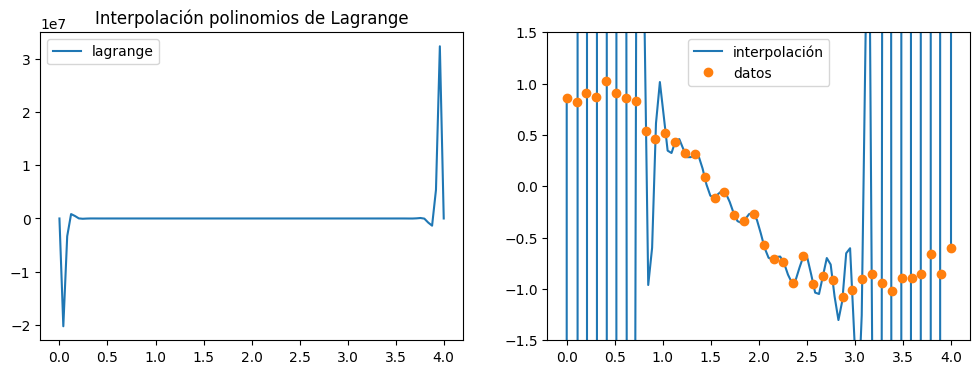

In [7]:
x = np.linspace(0, 4, 100)  # Valores de x a interpolar
interp = [lagrange(xi, puntos) for xi in x] #resultados de las interpolaciones para diferentes x

#graficamos la interpolación con lagrange y los puntos originales.
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(x, [lagrange(xi, puntos) for xi in x], label='lagrange')
plt.title( 'Interpolación polinomios de Lagrange')
plt.legend()

#mismo gráfico, pero con límites en el eje y, para poder observar los puntos originales.
plt.subplot(1, 2, 2)
plt.plot(x,interp, label='interpolación')
plt.ylim(-1.5, 1.5)
plt.plot(puntos[:,0], puntos[:,1], 'o', label='datos')
plt.legend()

Los polinomios de lagrange, a pesar de pasar exactamente por los puntos pedidos, cuando son de alto orden tienen problemas al intentar interpolar una función. Al tener 40 puntos, el polinomio es de orden 39, alcanzdo oscilaciones extremadamente grandes, lo que genera un error muy grande. Por esto, en la gráfica se tuvo que restringir lo que se muestra en el eje y para poder verificar que la interpolación efectivamente pasara por los puntos indicados.
Por lo tanto, los polinomios de lagrange son una mala aproximación.


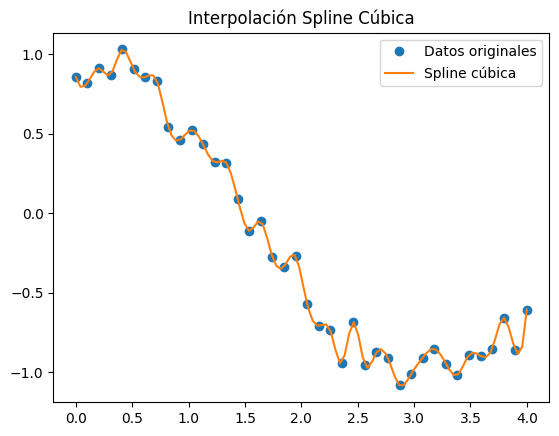

In [9]:
from scipy.interpolate import interp1d
#se van a separar los elementos de los puntos en x e y para poder usarlos en la función interp1d de scipy
x1 = puntos[:, 0]
y1 = puntos[:, 1]
f = interp1d(x1, y1, kind='cubic') # función de scipy que realiza la interpolación con cubic spline sobre los puntos entregados

#gráfica
plt.plot(x1, y1, 'o', label='Datos originales')
plt.plot( x, f(x), '-', label='Spline cúbica')
plt.title( 'Interpolación Spline Cúbica')
plt.legend()
plt.show()

La spline cúbica se ajusta bien a los datos sin grandes variaciones, es mucho más estable que la interpolación con polinomios de lagrange. Además de ser más estable, también es continua y derivable

La spline cúbica es mejor cuando se necesita suavidad y continuidad en las derivadas, mientras que los polinomios de Lagrange hacen que la interpolación pase exactamente por los puntos dados.